# Case Study #9 

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine_data = pd.read_csv('Datasets/Wine.csv')
wine_data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
%whos

Variable                  Type                       Data/Info
--------------------------------------------------------------
AgglomerativeClustering   type                       <class 'sklearn.cluster._<...>AgglomerativeClustering'>
hc                        AgglomerativeClustering    AgglomerativeClustering(n_clusters=3)
np                        module                     <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd                        module                     <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt                       module                     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
wine_data                 DataFrame                       Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]


In [6]:
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

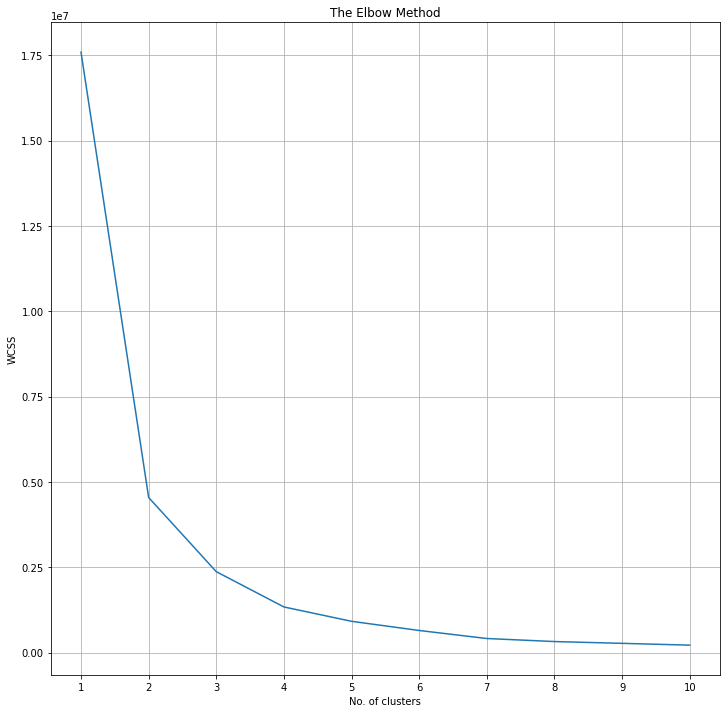

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,12))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.grid()
plt.show()

From the above graph we can see that the elbow of the curve is at K = 3. So we can take the no. of clusters as 3.

In [8]:
#k-means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(wine_data)
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

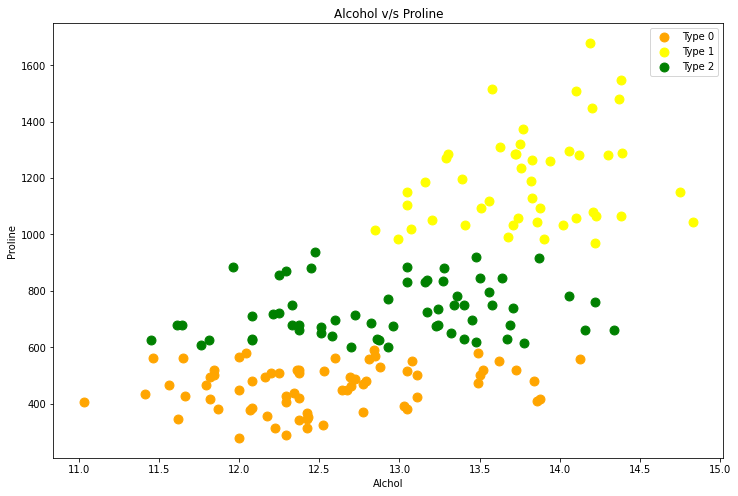

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(wine_data.iloc[clusters == 0, 0], wine_data.iloc[clusters == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_data.iloc[clusters == 1, 0], wine_data.iloc[clusters == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_data.iloc[clusters == 2, 0], wine_data.iloc[clusters == 2, 12], s = 80, c = 'green', label = 'Type 2')
plt.legend()
plt.title("Alcohol v/s Proline")
plt.xlabel('Alchol')
plt.ylabel('Proline')
plt.show()

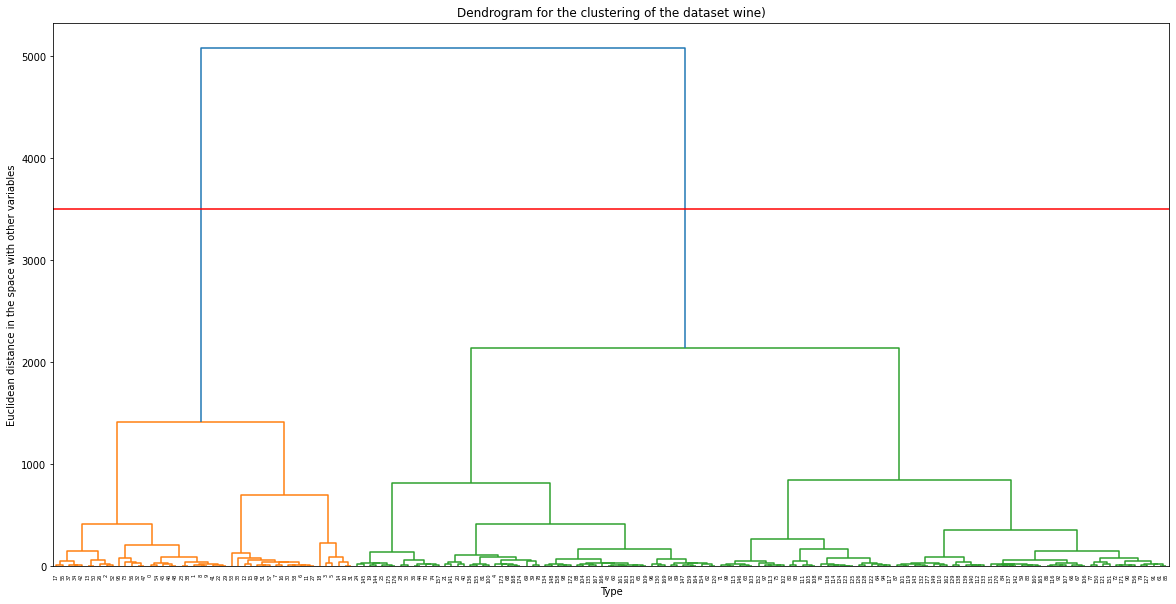

In [10]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(wine_data, method = "ward"))
plt.hlines(3500,0,6000,colors="red" , linestyles="solid") # for thehorizontal cut line 
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

By analyzing the above dendrogram we can take the optimal no. of clusters as 2

In [13]:
# performing agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2 , affinity = "euclidean" , linkage = "ward")
model_hc = hc.fit(wine_data)
HC_clusters = model_hc.labels_
HC_clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

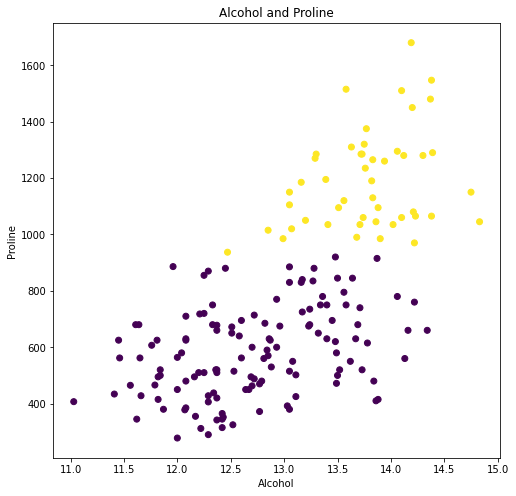

In [16]:
plt.figure(figsize=(8,8))
plt.title("Alcohol and Proline")
plt.scatter(wine_data["Alcohol"], wine_data["Proline"], c = HC_clusters)
plt.xlabel("Alcohol")
plt.ylabel("Proline")
plt.show()

## Conclusion

The wine dataset can be grouped into either 2 or 3 clusters.